In [1]:
#28-04-2020
#covid-19 outbreak prediction using machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Downloads\\indcov.csv')
df

,S. No.,Name of State / UT,Total Confirmed cases (Including 111 foreign Nationals),Cured/Discharged/Migrated,Death
0,1,Andaman and Nicobar Islands,33,11,0
1,2,Andhra Pradesh,1259,258,31
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,38,27,1
4,5,Bihar,346,57,2
5,6,Chandigarh,40,17,0
6,7,Chhattisgarh,37,32,0
7,8,Delhi,3108,877,54
8,9,Goa,7,7,0
9,10,Gujarat,3548,394,162


In [3]:
df.drop(['S. No.'],axis=1,inplace=True)
total_cases=df['Total Confirmed cases (Including 111 foreign Nationals)'].sum()
print('Total Confirmed cases (Including 111 foreign Nationals)=',total_cases)

Total Confirmed cases (Including 111 foreign Nationals)= 29834


In [4]:
total_deaths=df['Death'].sum()
print('Total Deaths in India=',total_deaths)

Total Deaths in India= 937


In [5]:
total_cured=df['Cured/Discharged/Migrated'].sum()
print('Total cured in India=',total_cured)

Total cured in India= 7027


In [6]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Including 111 foreign Nationals),Cured/Discharged/Migrated,Death
0,Andaman and Nicobar Islands,33,11,0
1,Andhra Pradesh,1259,258,31
2,Arunachal Pradesh,1,1,0
3,Assam,38,27,1
4,Bihar,346,57,2
5,Chandigarh,40,17,0
6,Chhattisgarh,37,32,0
7,Delhi,3108,877,54
8,Goa,7,7,0
9,Gujarat,3548,394,162


In [6]:
# total active cases in india
df['active cases']=df['Total Confirmed cases (Including 111 foreign Nationals)']-(df['Cured/Discharged/Migrated']+df['Death'])
active_cases=df['active cases'].sum()
print('total active cases in india=',active_cases+140)

total active cases in india= 22010


In [7]:
df_cor=pd.read_csv('Downloads\\cord.csv')
df_cor

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [8]:
import folium
from folium import plugins

In [9]:
df_mrg=pd.merge(df_cor,df,on='Name of State / UT')
map=folium.Map(location=[20,78],zoom_start=4,tiles='Stamenterrain')
folium.CircleMarker(location=[20,78],radius=50,popup='',line_color='red',fill_color='red').add_to(map)
map
df_mrg

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Including 111 foreign Nationals),Cured/Discharged/Migrated,Death,active cases
0,Andhra Pradesh,14.750429,78.570026,1259,258,31,970
1,Arunachal Pradesh,27.100399,93.616601,1,1,0,0
2,Assam,26.749981,94.216667,38,27,1,10
3,Bihar,25.785414,87.479973,346,57,2,287
4,Chandigarh,30.719997,76.780006,40,17,0,23
5,Chhattisgarh,22.090420,82.159987,37,32,0,5
6,Delhi,28.669993,77.230004,3108,877,54,2177
7,Goa,15.491997,73.818001,7,7,0,0
8,Haryana,28.450006,77.019991,296,183,3,110
9,Himachal Pradesh,31.100025,77.166597,40,22,1,17


In [11]:
import seaborn as sns
data=df[['Name of State / UT','Total Confirmed cases (Including 111 foreign Nationals)','Cured/Discharged/Migrated','Death']]

In [12]:
data.sort_values('Total Confirmed cases (Including 111 foreign Nationals)',ascending=False,inplace=True)

D:\abc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


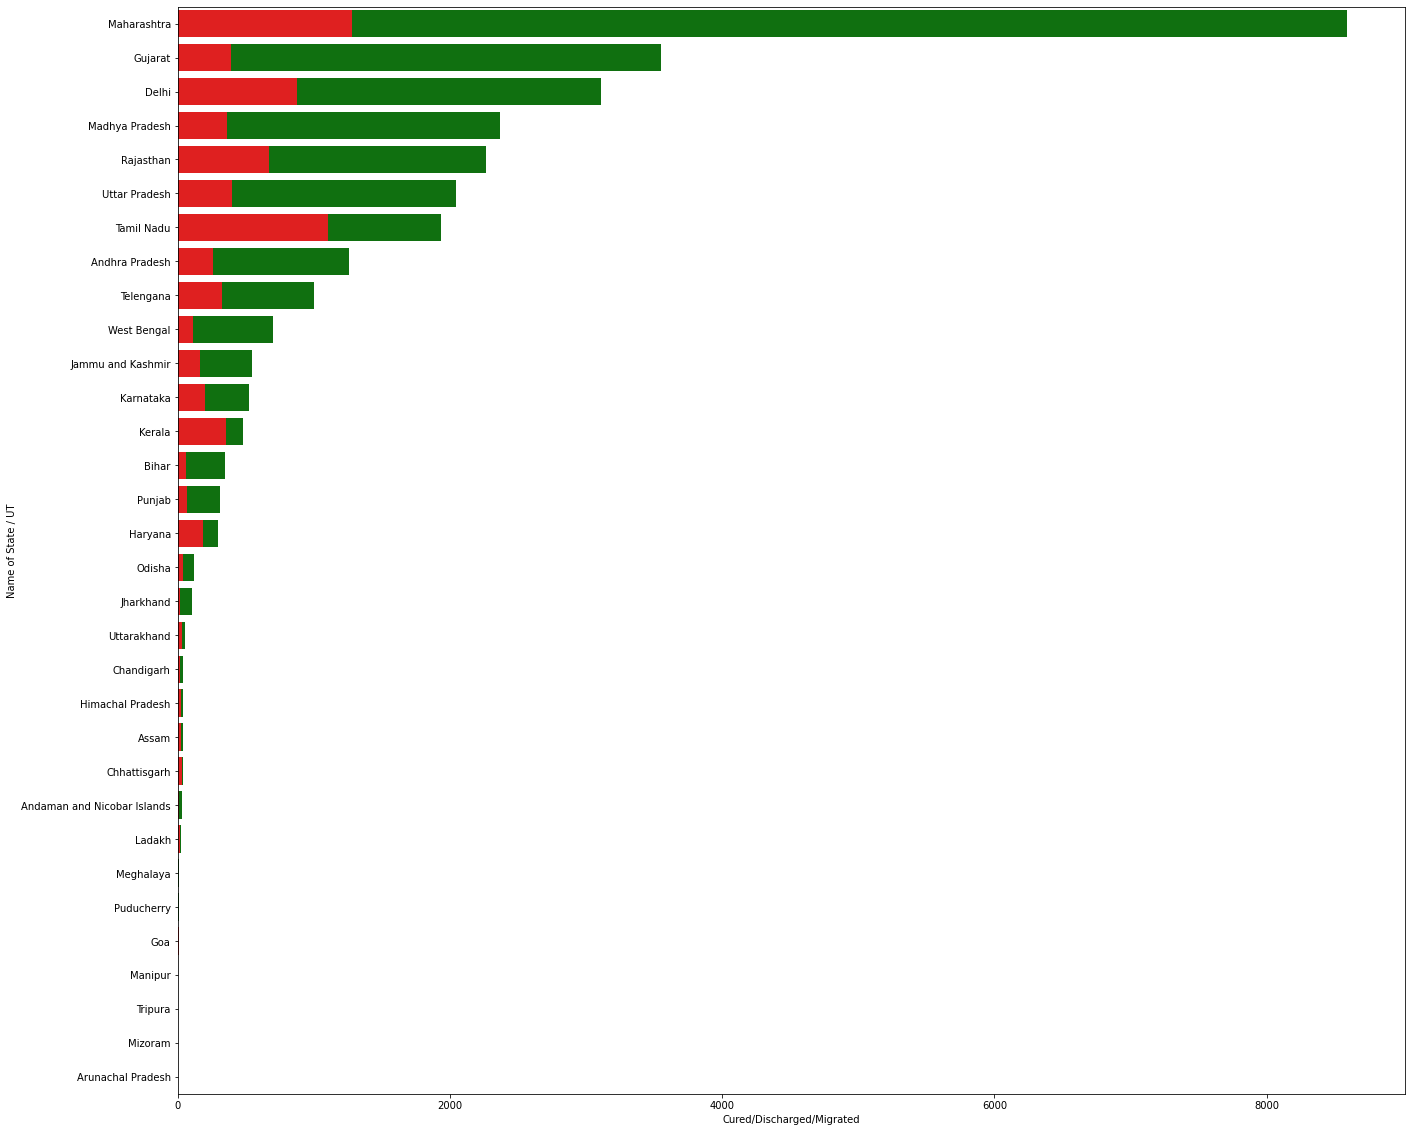

In [13]:
f,ax=plt.subplots(figsize=(22,20))
sns.barplot(x='Total Confirmed cases (Including 111 foreign Nationals)',y='Name of State / UT',data=data,label='Total',color='g')
sns.barplot(x='Cured/Discharged/Migrated',y='Name of State / UT',data=data,label='Total',color='r')


In [14]:
from fbprophet import Prophet

In [15]:
df=pd.read_csv('C:\\Users\\Beast\\Downloads\\covid_19_clean_complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,3/23/20,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,3/23/20,0.0,1.0,0.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,3/23/20,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,3/23/20,0.0,0.0,0.0


In [17]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
Deaths=df.groupby('Date').sum()['Deaths'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()

In [18]:
confirmed.columns=[' ','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])

In [19]:
confirmed.tail()

,ds,y
57,2020-03-05,97710.0
58,2020-03-06,101567.0
59,2020-03-07,105485.0
60,2020-03-08,109343.0
61,2020-03-09,113044.0


In [21]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [22]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872975,334646.155014,375188.415788
65,2020-03-27,372235.326939,351822.932992,393778.036119
66,2020-03-28,388674.964143,367918.687035,409471.610450
67,2020-03-29,405307.954676,384126.369778,427595.633048
68,2020-03-30,418529.648467,395460.607842,440263.984460


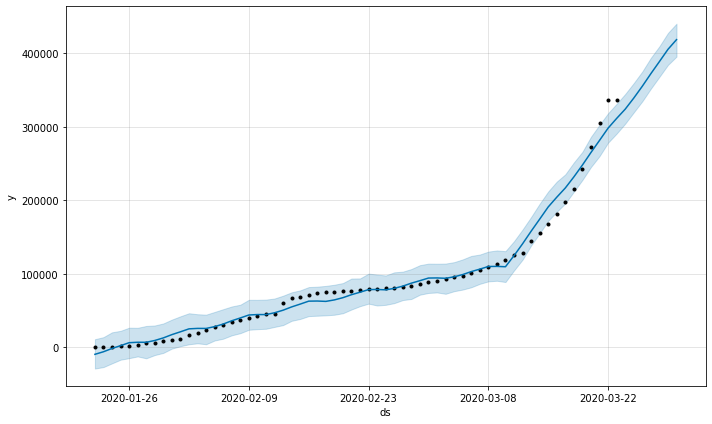

In [23]:
confirmed_forecast_plot=m.plot(forecast)

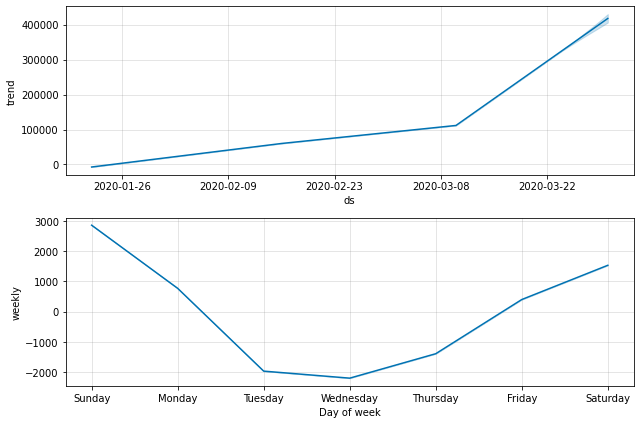

In [24]:
confirmed_forecast_plot=m.plot_components(forecast)

In [22]:
data

,Name of State / UT,Total Confirmed cases (Including 111 foreign Nationals),Cured/Discharged/Migrated,Death
18,Maharashtra,8590,1282,369
9,Gujarat,3548,394,162
7,Delhi,3108,877,54
17,Madhya Pradesh,2368,361,113
25,Rajasthan,2262,669,46
30,Uttar Pradesh,2043,400,31
26,Tamil Nadu,1937,1101,24
1,Andhra Pradesh,1259,258,31
27,Telengana,1004,321,26
31,West Bengal,697,109,20
